

---


This notebook contains the Tables and Figures including the code used to produce them for the paper Creating high quality threat data for CTI systems using keyword filtering and clustering by Ariel Rodriguez.


---


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.cm as cm

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", None)

In [0]:
#Table 1
#\caption{Overview of datasets used in this study showing the size of each dataset and the weighting of positive and negative data points as well as the number of distinct words in each datasets vocabulary. }

Table_1_index=["F1 (Full)", "T1 (Twitter)","R1 (Reddit)", "S1 (Stack Exchange)","A1 (Articles)", "S2 (Short)", "M1 (Medium)", "L1 (Long)"]

Table_1_data = np.array([[1016346,139841,9709,858801,7996,313839,611892,90612], [179930,24674,1713,151549,1995,34582,117584,27761], [1196276,164515,11422,1010350,9991,348421,729476,118373]
               ,["50%","53%","50%","50%","50%","63%","45%","41%"], ["50%","47%","50%","50%","50%","37%","55%","59%"], ["50%","53%","50%","50%","50%","41%","59%","65%"]
               ,["50%","47%","50%","50%","50%","59%","51%","35%"], [607,90,660,935,3807,86,3070,513]               ])

Table_1 = pd.DataFrame(Table_1_data.transpose(),columns=["Training-Set","Testing-Set","Total-Entries", "Train-Balance-Sec", "Train-Balance-Non-Sec", "Test-Balance-Sec","Test-Balance-Non-Sec","Avg Length"],index=Table_1_index)

print (Table_1)
print ("#######################################################")
print(Table_1.to_latex())  

                    Training-Set Testing-Set Total-Entries Train-Balance-Sec  \
F1 (Full)                1016346      179930       1196276               50%   
T1 (Twitter)              139841       24674        164515               53%   
R1 (Reddit)                 9709        1713         11422               50%   
S1 (Stack Exchange)       858801      151549       1010350               50%   
A1 (Articles)               7996        1995          9991               50%   
S2 (Short)                313839       34582        348421               63%   
M1 (Medium)               611892      117584        729476               45%   
L1 (Long)                  90612       27761        118373               41%   

                    Train-Balance-Non-Sec Test-Balance-Sec  \
F1 (Full)                             50%              50%   
T1 (Twitter)                          47%              53%   
R1 (Reddit)                           50%              50%   
S1 (Stack Exchange)            

In [0]:
#Table 2
#\caption{This table shows the classification results on all of our datasets using the precision and f1-score metrics for our method and other baseline methods and BERT}

Table_2_index = [["F1","F1","T1","T1","R1","R1","S1","S1","A1","A1","S2","S2","M1","M1","L1","L1"],
                ["Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score"]]

Table_2_data = np.array([[0.8586,0.9230,0.9992,0.9993,0.8596,0.9245,0.8622,0.9252,0.9497,0.9731,0.9946,0.9969,0.8118,0.8898,0.8609,0.9251],[0.9877,0.9702,0.9998,0.9993,0.9653,0.9533,0.9467,0.9326,0.9858,0.9824,0.8666,0.9173,0.9670,0.9409,0.9478,0.9401],
                        [0.9291,0.9288,0.9510,0.9686,0.8344,0.8999,0.9131,0.9222,0.9191,0.9376,0.6674,0.7986,0.9436,0.9204,0.9852,0.9367],[0.9155,0.9284,0.9995,0.9969,0.9399,0.9070,0.9163,0.9127,0.9773,0.9639,0.8023,0.8854,0.9422,0.9195,0.9863,0.9578],
                        [0.9304,0.9034,0.9998,0.9960,0.9522,0.9288,0.8815,0.8684,0.9867,0.9782,0.7309,0.8391,0.9423,0.8912,0.9878,0.9511]])

Table_2 = pd.DataFrame(Table_2_data.transpose(),columns=["MLKF","BERT","NB", "LG", "SGD"],index=Table_2_index)

print (Table_2)
print ("#######################################################")
print(Table_2.to_latex())  

                MLKF    BERT      NB      LG     SGD
F1 Precision  0.8586  0.9877  0.9291  0.9155  0.9304
   F1-Score   0.9230  0.9702  0.9288  0.9284  0.9034
T1 Precision  0.9992  0.9998  0.9510  0.9995  0.9998
   F1-Score   0.9993  0.9993  0.9686  0.9969  0.9960
R1 Precision  0.8596  0.9653  0.8344  0.9399  0.9522
   F1-Score   0.9245  0.9533  0.8999  0.9070  0.9288
S1 Precision  0.8622  0.9467  0.9131  0.9163  0.8815
   F1-Score   0.9252  0.9326  0.9222  0.9127  0.8684
A1 Precision  0.9497  0.9858  0.9191  0.9773  0.9867
   F1-Score   0.9731  0.9824  0.9376  0.9639  0.9782
S2 Precision  0.9946  0.8666  0.6674  0.8023  0.7309
   F1-Score   0.9969  0.9173  0.7986  0.8854  0.8391
M1 Precision  0.8118  0.9670  0.9436  0.9422  0.9423
   F1-Score   0.8898  0.9409  0.9204  0.9195  0.8912
L1 Precision  0.8609  0.9478  0.9852  0.9863  0.9878
   F1-Score   0.9251  0.9401  0.9367  0.9578  0.9511
#######################################################
\begin{tabular}{llrrrrr}
\toprule
   &     

In [0]:
#Table 3
#\caption{This table shows classification scores and processing times for a CTI system implementing the optimal settings based on classification score and speed for both the full dataset and ensemble learning methods.}
index = ["Full Dataset (Highest Score)","Full Dataset (Fastest)","Ensemble Learning (Platform : Highest Score)","Ensemble Learning (Length : Highest Score)","Ensemble Learning (Platform : Fastest)","Ensemble Learning (Fastest : Length)"]
data = [["Bert","","","","","","","","0.9877","0.9702","2.12 min"],["SGD","","","","","","","","0.9304","0.9034","340 ms"],["","BERT","BERT","BERT","BERT","","","","0.9742","0.9669","2.2 min"],["","","","","","MLKF","BERT","SGD","0.9826","0.9652","275 ms"],["","LR","MLKF","LR","LR","","","","0.9448","0.9480","127 ms"],["","","","","","LR","SGD","LR","0.9103","0.9114","269 ms"]]

df = pd.DataFrame(data,
                  index=index,
                  columns=["F1","T1","R1","S1","A1","S2","M1","L1","Total Precision","Total F1-Score","Total Time"])

print (df)
print ("#######################################################")
print(df.to_latex())  


                                                F1    T1    R1    S1    A1  \
Full Dataset (Highest Score)                  Bert                           
Full Dataset (Fastest)                         SGD                           
Ensemble Learning (Platform : Highest Score)        BERT  BERT  BERT  BERT   
Ensemble Learning (Length : Highest Score)                                   
Ensemble Learning (Platform : Fastest)                LR  MLKF    LR    LR   
Ensemble Learning (Fastest : Length)                                         

                                                S2    M1   L1 Total Precision  \
Full Dataset (Highest Score)                                           0.9877   
Full Dataset (Fastest)                                                 0.9304   
Ensemble Learning (Platform : Highest Score)                           0.9742   
Ensemble Learning (Length : Highest Score)    MLKF  BERT  SGD          0.9826   
Ensemble Learning (Platform : Fastest)          

In [0]:
#Table 4
#\caption{This table shows the vector size, training epochs and associated words list length which produced the best classification scores for each dataset on both F1-Score and precision metrics.}
	
index = [["F1","F1","T1","T1","R1","R1","S1","S1","A1","A1","S2","S2","M1","M1","L1","L1"],
        ["Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score","Precision","F1-Score"]]
data = np.array([[10,50,10,10,50,10,10,50,10,10,10,50,10,50,10,50],[50,50,50,100,50,50,50,50,50,50,50,100,50,100,50,50],[0,2500,0,2500,0,2500,0,2500,0,2500,0,2500,0,2500,0,2500]])

df = pd.DataFrame(data.transpose(),
                  index=index,
                  columns=['Vector Size', 'Epochs',"AWL Length"])
print (df)
print ("#######################################################")
print(df.to_latex())  


              Vector Size  Epochs  AWL Length
F1 Precision           10      50           0
   F1-Score            50      50        2500
T1 Precision           10      50           0
   F1-Score            10     100        2500
R1 Precision           50      50           0
   F1-Score            10      50        2500
S1 Precision           10      50           0
   F1-Score            50      50        2500
A1 Precision           10      50           0
   F1-Score            10      50        2500
S2 Precision           10      50           0
   F1-Score            50     100        2500
M1 Precision           10      50           0
   F1-Score            50     100        2500
L1 Precision           10      50           0
   F1-Score            50      50        2500
#######################################################
\begin{tabular}{llrrr}
\toprule
   &          &  Vector Size &  Epochs &  AWL Length \\
\midrule
F1 & Precision &           10 &      50 &           0 \\
   & F1-

In [0]:
#Table 5
#	\caption{This table shows the classification results on all of our datasets using the precision and f1-score metrics for our method and other baseline methods and BERT}

index = ["F1","T1","R1","S1","A1","S2","M1","L1"]

data = np.array([["1.9564","0.2377","3.7120","2.9976","2.1182","0.2271","2.6051","0.6238"],["1.8802","0.1528","3.4316","2.5613","0.6200","0.2033","2.9592","0.5919"],
                 ["1.5220","0.1142","1.3006","1.5370","-0.742","0.0980","1.8458","0.4707"],["0.5071","0.0342","0.3767","0.4693","-0.238","0.0318","0.5441","0.1479"],
                 ["5.8659","0.5390","8.8211","7.5654","1.7571","0.5607","7.9545","1.8345"]])

df = pd.DataFrame(data.transpose(),
                  index=index,
                  columns=['0 - 50', '50 - 250',"250 - 1000","1000 - 2500","0 - 2500"])

print (df)
print ("#######################################################")
print(df.to_latex())  


    0 - 50 50 - 250 250 - 1000 1000 - 2500 0 - 2500
F1  1.9564   1.8802     1.5220      0.5071   5.8659
T1  0.2377   0.1528     0.1142      0.0342   0.5390
R1  3.7120   3.4316     1.3006      0.3767   8.8211
S1  2.9976   2.5613     1.5370      0.4693   7.5654
A1  2.1182   0.6200     -0.742      -0.238   1.7571
S2  0.2271   0.2033     0.0980      0.0318   0.5607
M1  2.6051   2.9592     1.8458      0.5441   7.9545
L1  0.6238   0.5919     0.4707      0.1479   1.8345
#######################################################
\begin{tabular}{llllll}
\toprule
{} &  0 - 50 & 50 - 250 & 250 - 1000 & 1000 - 2500 & 0 - 2500 \\
\midrule
F1 &  1.9564 &   1.8802 &     1.5220 &      0.5071 &   5.8659 \\
T1 &  0.2377 &   0.1528 &     0.1142 &      0.0342 &   0.5390 \\
R1 &  3.7120 &   3.4316 &     1.3006 &      0.3767 &   8.8211 \\
S1 &  2.9976 &   2.5613 &     1.5370 &      0.4693 &   7.5654 \\
A1 &  2.1182 &   0.6200 &     -0.742 &      -0.238 &   1.7571 \\
S2 &  0.2271 &   0.2033 &     0.0980 &      

In [0]:
#Table 5
#	\caption{This table shows the classification scores achieved for our method when using stemming, lemmatization and leaving terms in their original form.}

index = [["F1","F1","F1","T1","T1","T1","R1","R1","R1","S1","S1","S1","A1","A1","A1","S2","S2","S2","M1","M1","M1","L1","L1","L1"],
         ["none","stemming","lemmatization","none","stemming","lemmatization","none","stemming","lemmatization","none","stemming","lemmatization","none","stemming","lemmatization","none","stemming","lemmatization","none","stemming","lemmatization","none","stemming","lemmatization"]]

data = np.array([[0.8575,0.8586,0.8277,0.9992,0.9992,0.9962,0.8596,0.8596,0.8818,0.8617,0.8622,0.8644,0.9498,0.9497,0.9456,0.9936,0.9946,0.9724,0.7640,0.8118,0.8135,0.8605,0.8609,0.8619],
                 [0.7585,0.9230,0.7769,0.9972,0.9993,0.2773,0.8327,0.9245,0.8937,0.8476,0.9252,0.8499,0.9198,0.9731,0.8801,0.9649,0.9969,0.2951,0.8018,0.8898,0.8294,0.8998,0.9251,0.8982],
                 ["625,542","560,823","613,264","59,222","48,039","55,269","42,268","29,909","38,253","565,216","509,906","555,488","73,238","52,179","66,489","84,508","67,668","79,340","294,459","251,758","285,628","433,236","389,508","423,369"]])

df = pd.DataFrame(data.transpose(),
                  index=index,
                  columns=['Precision', 'F1-Score','Vocab Size'])

print (df)
print ("#######################################################")
print(df.to_latex())  


                 Precision F1-Score Vocab Size
F1 none             0.8575   0.7585    625,542
   stemming         0.8586    0.923    560,823
   lemmatization    0.8277   0.7769    613,264
T1 none             0.9992   0.9972     59,222
   stemming         0.9992   0.9993     48,039
   lemmatization    0.9962   0.2773     55,269
R1 none             0.8596   0.8327     42,268
   stemming         0.8596   0.9245     29,909
   lemmatization    0.8818   0.8937     38,253
S1 none             0.8617   0.8476    565,216
   stemming         0.8622   0.9252    509,906
   lemmatization    0.8644   0.8499    555,488
A1 none             0.9498   0.9198     73,238
   stemming         0.9497   0.9731     52,179
   lemmatization    0.9456   0.8801     66,489
S2 none             0.9936   0.9649     84,508
   stemming         0.9946   0.9969     67,668
   lemmatization    0.9724   0.2951     79,340
M1 none              0.764   0.8018    294,459
   stemming         0.8118   0.8898    251,758
   lemmatizat

In [0]:
#Table 7
#\caption{This table shows the total processing times in milliseconds for a processing only version and full version of our method across all datasets for both CPU and GPU processors for all the models we tested.}

index = [["F1","F1","F1","F1","T1","T1","T1","T1","R1","R1","R1","R1","S1","S1","S1","S1","A1","A1","A1","A1","S2","S2","S2","S2","M1","M1","M1","M1","L1","L1","L1","L1"],["CPU","CPU","GPU","GPU","CPU","CPU","GPU","GPU","CPU","CPU","GPU","GPU","CPU","CPU","GPU","GPU","CPU","CPU","GPU","GPU","CPU","CPU","GPU","GPU","CPU","CPU","GPU","GPU","CPU","CPU","GPU","GPU"],["Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full","Processing","Full"]]

data = np.array([["174 ms", "790 ms", "141 ms", "647 ms","12.5 ms", "25.4 ms", "9.36 ms", "19.4 ms","65.3 ms","240 ms","55.1 ms","207 ms","13.4 ms","172 ms","11.1 ms","127 ms","218 ms","635 ms","186 ms","558 ms","12.7 ms","43.8 ms","9.73 ms","35.2 ms","39.8 ms","226 ms","31.9 ms","180 ms","159 ms","487 ms","139 ms","421 ms"],
                ["1140 ms","127200 ms", "1040 ms", "2330 ms", "65.3 ms", "127200 ms", "62 ms", "1290 ms","368 ms","132000 ms","343 ms","1650 ms","68.5 ms","129000 ms","60.7 ms","1290 ms","1370 ms","83400 ms","1270 ms","2290 ms","51.7 ms","39100 ms","46.5 ms","425 ms","219 ms","121200 ms","202 ms","1500 ms","1170 ms","129600 ms","1060 ms","2300 ms"],
                ["138 ms", "487 ms", "126 ms", "474 ms", "9.44 ms", "23.1 ms", "8.5 ms", "18.5 ms","45.4 ms","71.7 ms","41.1 ms","63.3 ms","9.82 ms","267 ms","8.64 ms","233 ms","168 ms","291 ms","151 ms","256 ms","9.39 ms","35.8 ms","8.32 ms","27.3 ms","28.6 ms","215 ms","25.2 ms","189 ms","137 ms","355 ms","122 ms","343 ms"],
                ["144 ms", "358 ms", "120 ms", "347 ms", "10.9 ms", "20.4 ms", "8.09 ms", "13.9 ms","48.6 ms","73.5 ms","40.2 ms","55.3 ms","10.8 ms","170 ms","8.46 ms","142 ms","10.6 ms","38.4 ms","144 ms","236 ms","11.1 ms","28 ms","8.15 ms","19.6 ms","31 ms","145 ms","23.8 ms","133 ms","143 ms","318 ms","117 ms","269 ms"],
                ["137 ms", "374 ms","125 ms", "340 ms", "8.99 ms", "17 ms", "8.38 ms", "14.4 ms","45.4 ms","66.7 ms","40.8 ms","58.9 ms","10.3 ms","167 ms","8.49 ms","161 ms","167 ms","269 ms","153 ms","246 ms","9.84 ms","25.7 ms","8.6 ms","20.9 ms","28.1 ms","142 ms","25.6 ms","116 ms","137 ms","298 ms","125 ms","275 ms"]])


df = pd.DataFrame(data.transpose(),
                  index=index,
                  columns=["MLKF","BERT","LR","SGD","NB"])


print (df)
print ("#######################################################")
print(df.to_latex())  

                      MLKF       BERT       LR      SGD       NB
F1 CPU Processing   174 ms    1140 ms   138 ms   144 ms   137 ms
       Full         790 ms  127200 ms   487 ms   358 ms   374 ms
   GPU Processing   141 ms    1040 ms   126 ms   120 ms   125 ms
       Full         647 ms    2330 ms   474 ms   347 ms   340 ms
T1 CPU Processing  12.5 ms    65.3 ms  9.44 ms  10.9 ms  8.99 ms
       Full        25.4 ms  127200 ms  23.1 ms  20.4 ms    17 ms
   GPU Processing  9.36 ms      62 ms   8.5 ms  8.09 ms  8.38 ms
       Full        19.4 ms    1290 ms  18.5 ms  13.9 ms  14.4 ms
R1 CPU Processing  65.3 ms     368 ms  45.4 ms  48.6 ms  45.4 ms
       Full         240 ms  132000 ms  71.7 ms  73.5 ms  66.7 ms
   GPU Processing  55.1 ms     343 ms  41.1 ms  40.2 ms  40.8 ms
       Full         207 ms    1650 ms  63.3 ms  55.3 ms  58.9 ms
S1 CPU Processing  13.4 ms    68.5 ms  9.82 ms  10.8 ms  10.3 ms
       Full         172 ms  129000 ms   267 ms   170 ms   167 ms
   GPU Processing  11.1 m

In [0]:
#Table 8
#	\caption{This table shows the optimal vector size and clusters (K) based on Davies-Bouldin and Silhouette score for each of our datasets.}

index = pd.MultiIndex.from_product([["F1","T1","R1","S1","A1","S2","M1","L1"]], names=["Dataset"])

columns = pd.MultiIndex.from_product([['Davies-Bouldin Score', 'Silhouette Score'], ['Vector Size', 'Clusters', 'Score']])

data = np.array([[10,2000,2000,10,10,10,10,10],[10, 7, 2, 10, 9, 10, 9, 10],
        [1.988,0.561,0.860,1.983,1.758,2.15,2.081,1.939],[1000,2000,2000,2000,10,10,10,10],
        [2,2,2,2,10,2,2,2],[0.162,0.565,0.507,0.162,0.139,0.074,0.111,0.222]])

df = pd.DataFrame(data.transpose(), index=index, columns=columns)

print (df)
print ("#######################################################")
print(df.to_latex())  

        Davies-Bouldin Score                 Silhouette Score                
                 Vector Size Clusters  Score      Vector Size Clusters  Score
Dataset                                                                      
F1                      10.0     10.0  1.988           1000.0      2.0  0.162
T1                    2000.0      7.0  0.561           2000.0      2.0  0.565
R1                    2000.0      2.0  0.860           2000.0      2.0  0.507
S1                      10.0     10.0  1.983           2000.0      2.0  0.162
A1                      10.0      9.0  1.758             10.0     10.0  0.139
S2                      10.0     10.0  2.150             10.0      2.0  0.074
M1                      10.0      9.0  2.081             10.0      2.0  0.111
L1                      10.0     10.0  1.939             10.0      2.0  0.222
#######################################################
\begin{tabular}{lrrrrrr}
\toprule
   & \multicolumn{3}{l}{Davies-Bouldin Score} & \mul

In [0]:
#Table 9
#\caption{Top 15 terms for each k-means generated cluster based on TFIDF score.}

index = [["T1","T1","T1","T1","T1","T1","T1","R1","R1","R1","S1","S1","S1","S1","S1","S1","S1","S1","S1","S1","A1","A1","A1","A1","A1","A1","A1","A1","A1","A1"],
         [0,1,2,3,4,5,6,0,1,2,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9]]

data = np.array(["cybersecurity, malware, latest, daily, security, phishing, ransomware, cybercrime, via, new, cyber, news, spyware, attack, 2019",
                 "cybersecurity, malware, ransomware, security, via, phishing, latest, new, attack, daily, cybercrime, attacks, spyware, cyber, business",
                 "cybersecurity, malware, ransomware, latest, security, phishing, via, daily, new, cybercrime, cyber, spyware, attack, attacks, data",
                 "cybersecurity, ransomware, malware, latest, daily, via, security, phishing, spyware, attacks, hit, cybercrime, social, viren, trojaner",
                 "cybersecurity, latest, malware, daily, cybercrime, security, via, phishing, ransomware, new, spyware, hacking, 2019, news, xss",
                 "cybersecurity, latest, daily, security, malware, php, cyber, trojaner, viren, news, technology, shell, phishing, information, ransomware",
                 "cybersecurity, latest, malware, daily, security, phishing, ransomware, via, cybercrime, new, cyber, news, spyware, attack, attacks",
                 "security, exam, oscp, time, good, thanks, ceh, experience, course, questions, help, work, looking, take, guys",
                 "questions, exam, test, cissp, study,  practice, book, read, sybex, time, question, tests, boson, good, took",
                 "security, password, network, email, file, data, windows, time, server, account, kali, access, com, user, work",
                 "password, code, key, hash, strong, passwords, random, data, encryption, salt, security, time, attacker, bit, user",
                 "code, question, password, answer, security, user, server, strong, thanks, file, site, data, think, google, key",
                 "code, file, strong, php, user, script, data, html, server, security, function, name, string, page, content",
                 "key, code, certificate, server, client, strong, public, private, tls, ssl, certificates, rsa, security, keys, data",
                 "code, org, java, security, springframework, web, user, class, name, spring, public, login, authentication, filter, beans",
                 "user, code, password, server, strong, token, security, access, data, client, session, application, users, request, key",
                 "strong, security, data, password, information, email, user, access, phone, card, people, code, account, time, question",
                 "code, data, strong, system, file, access, user, key, security, password, files, windows, server, software, drive",
                 "code, server, network, strong, traffic, port, address, router, access, tcp, vpn, attack, connection, security, firewall",
                 "security, strong, code, question, data, answer, good, system, software, access, information, application, web, server, think",
                 "data, security, attack, information, company, breach, attacks, users, bank, malware, accounts, million, customers, hackers, according",
                 "malware, win32, file, code, files, malicious, system, com, eset, new, ransomware, user, trojan, banking, exe",
                 "facebook, email, information, security, scam, people, account, users, phishing, online, eset, social, scams, malware, data",
                 "security, android, password, passwords, app, users, apps, google, new, mobile, devices, phone, apple, device, malware",
                 "security, users, google, microsoft, vulnerability, data, facebook, windows, passwords, malware, password, adobe, information, flash,site",
                 "security, data, cyber, cybersecurity, information, privacy, report, cybercrime, new, businesses, online, companies, people, attacks, devices",
                 "security, data, devices, car, internet, malware, network, device, systems, computer, system, windows, software, information, access",
                 "apple, company, percent, uber, inc, yahoo, billion, data, software, new, companies, revenue, last, facebook, google",
                 "trump, russia, russian, clinton, election, putin, intelligence, campaign, president, security, officials, state, government, cyber, obama",
                 "malware, eset, security, virus, stuxnet, blog, testing, paper, amtso, research, time, article, malicious, information, david"])

df = pd.DataFrame(data.transpose(),
                  index=index,
                  columns=["TFIDF Ranked Terms"])


print (df)
print ("#######################################################")
print(df.to_latex())  

                                                                                                                                TFIDF Ranked Terms
T1 0               cybersecurity, malware, latest, daily, security, phishing, ransomware, cybercrime, via, new, cyber, news, spyware, attack, 2019
   1        cybersecurity, malware, ransomware, security, via, phishing, latest, new, attack, daily, cybercrime, attacks, spyware, cyber, business
   2            cybersecurity, malware, ransomware, latest, security, phishing, via, daily, new, cybercrime, cyber, spyware, attack, attacks, data
   3        cybersecurity, ransomware, malware, latest, daily, via, security, phishing, spyware, attacks, hit, cybercrime, social, viren, trojaner
   4                cybersecurity, latest, malware, daily, cybercrime, security, via, phishing, ransomware, new, spyware, hacking, 2019, news, xss
   5      cybersecurity, latest, daily, security, malware, php, cyber, trojaner, viren, news, technology, shell, phish

In [0]:
#Table 10
#	\caption{This table shows examples of unimportant cybersecurity relevant tweets from the same K-means cluster.}



data = np.array(["securityaffairs: Security Affairs newsletter Round 207 “News of the week. https://t.co/GpR1.. \#securityaffairs \#malware \#hacking",
                 "The latest The Apex CB Financial Daily! https://paper.li/apexcb/… \#ai \#cybersecurity",
                 "Posts from ThreatsHub Cybersecurity News for 04/01/2019 - https://t.co/stqsoPNrvZ"])

df = pd.DataFrame(data.transpose(), index=[1,2,3], columns=["Tweets"])

print (df)
print ("#######################################################")
print(df.to_latex())  

                                                                                                                                Tweets
1  securityaffairs: Security Affairs newsletter Round 207 “News of the week. https://t.co/GpR1.. \#securityaffairs \#malware \#hacking
2                                               The latest The Apex CB Financial Daily! https://paper.li/apexcb/… \#ai \#cybersecurity
3                                                    Posts from ThreatsHub Cybersecurity News for 04/01/2019 - https://t.co/stqsoPNrvZ
#######################################################
\begin{tabular}{ll}
\toprule
{} &                                                                                                                               Tweets \\
\midrule
1 &  securityaffairs: Security Affairs newsletter Round 207 “News of the week. https://t.co/GpR1.. \textbackslash \#securityaffairs \textbackslash \#malware \textbackslash \#hacking \\
2 &                                     

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


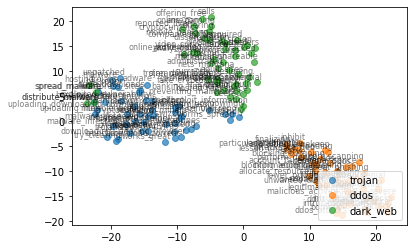

In [0]:
#Figure 3 
#	\caption{This figure shows the top 50 most similar terms for three attack terms, trojan, ddos and dark\_web. By training our model on only cybersecurity related data we can ensure the most similar terms are context specific to our domain.}
# adapted from https://habr.com/en/company/mailru/blog/449984/

keys = ['trojan','ddos','dark_web']

model = Word2Vec.load("/content/drive/My Drive/CTI datas/10vector_50full_dataset_mode_0_bigrams_fullds_no_stem")

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=50):
        words.append(similar_word)
        embeddings.append(model.wv.__getitem__(similar_word))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=15)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a):
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    
    plt.legend(loc=4)
    plt.show()


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters, 0.7)


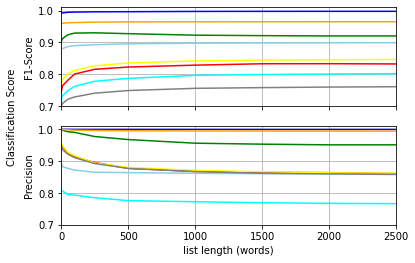

In [0]:
#Figure 4
#\caption{This figure shows the affect that the length of our associated words filter generated by our word2vec model has on classification for each dataset.} 

f1_df = pd.read_csv("/content/drive/My Drive/CTI datas/f1_associated_words_list.csv")
p_df = pd.read_csv("/content/drive/My Drive/CTI datas/precision_assocaited_words_lsit.csv")

fig, ax = plt.subplots(2,sharex='all')

ax[0].plot(list(map(int,list((f1_df.columns[1:])))), f1_df.values[0][1:],label="T1", color="blue")
ax[0].plot(list(map(int,list((f1_df.columns[1:])))), f1_df.values[1][1:],label="R1", color="red")
ax[0].plot(list(map(int,list((f1_df.columns[1:])))), f1_df.values[2][1:],label="S1", color="yellow")
ax[0].plot(list(map(int,list((f1_df.columns[1:])))), f1_df.values[3][1:],label="A1", color="green")
ax[0].plot(list(map(int,list((f1_df.columns[1:])))), f1_df.values[4][1:],label="S2", color="orange")
ax[0].plot(list(map(int,list((f1_df.columns[1:])))), f1_df.values[5][1:],label="M1", color="aqua")
ax[0].plot(list(map(int,list((f1_df.columns[1:])))), f1_df.values[6][1:],label="L1", color="skyblue")
ax[0].plot(list(map(int,list((f1_df.columns[1:])))), f1_df.values[7][1:],label="F1", color="grey")

ax[1].plot(list(map(int,list((p_df.columns[1:])))), p_df.values[0][1:],label="T1", color="blue")
ax[1].plot(list(map(int,list((p_df.columns[1:])))), p_df.values[1][1:],label="R1", color="red")
ax[1].plot(list(map(int,list((p_df.columns[1:])))), p_df.values[2][1:],label="S1", color="yellow")
ax[1].plot(list(map(int,list((p_df.columns[1:])))), p_df.values[3][1:],label="A1", color="green")
ax[1].plot(list(map(int,list((p_df.columns[1:])))), p_df.values[4][1:],label="S2", color="orange")
ax[1].plot(list(map(int,list((p_df.columns[1:])))), p_df.values[5][1:],label="M1", color="aqua")
ax[1].plot(list(map(int,list((p_df.columns[1:])))), p_df.values[6][1:],label="L1", color="skyblue")
ax[1].plot(list(map(int,list((p_df.columns[1:])))), p_df.values[7][1:],label="F1", color="grey")

#leg = ax[0].legend(loc='right');
ax[0].set_xlim([0,2500])
ax[0].set_ylim([0.7,1.01])
ax[0].set_ylabel('F1-Score')

ax[1].set_xlim([0,2500])
ax[1].set_ylim([0.7,1.01])
ax[1].set_xlabel('list length (words)')
ax[1].set_ylabel('Precision')

fig.text(0.00000001, 0.5, 'Classification Score', va='center', rotation='vertical')
#fig.tight_layout(pad=1.0)

ax[0].grid()
ax[1].grid()

plt.show()

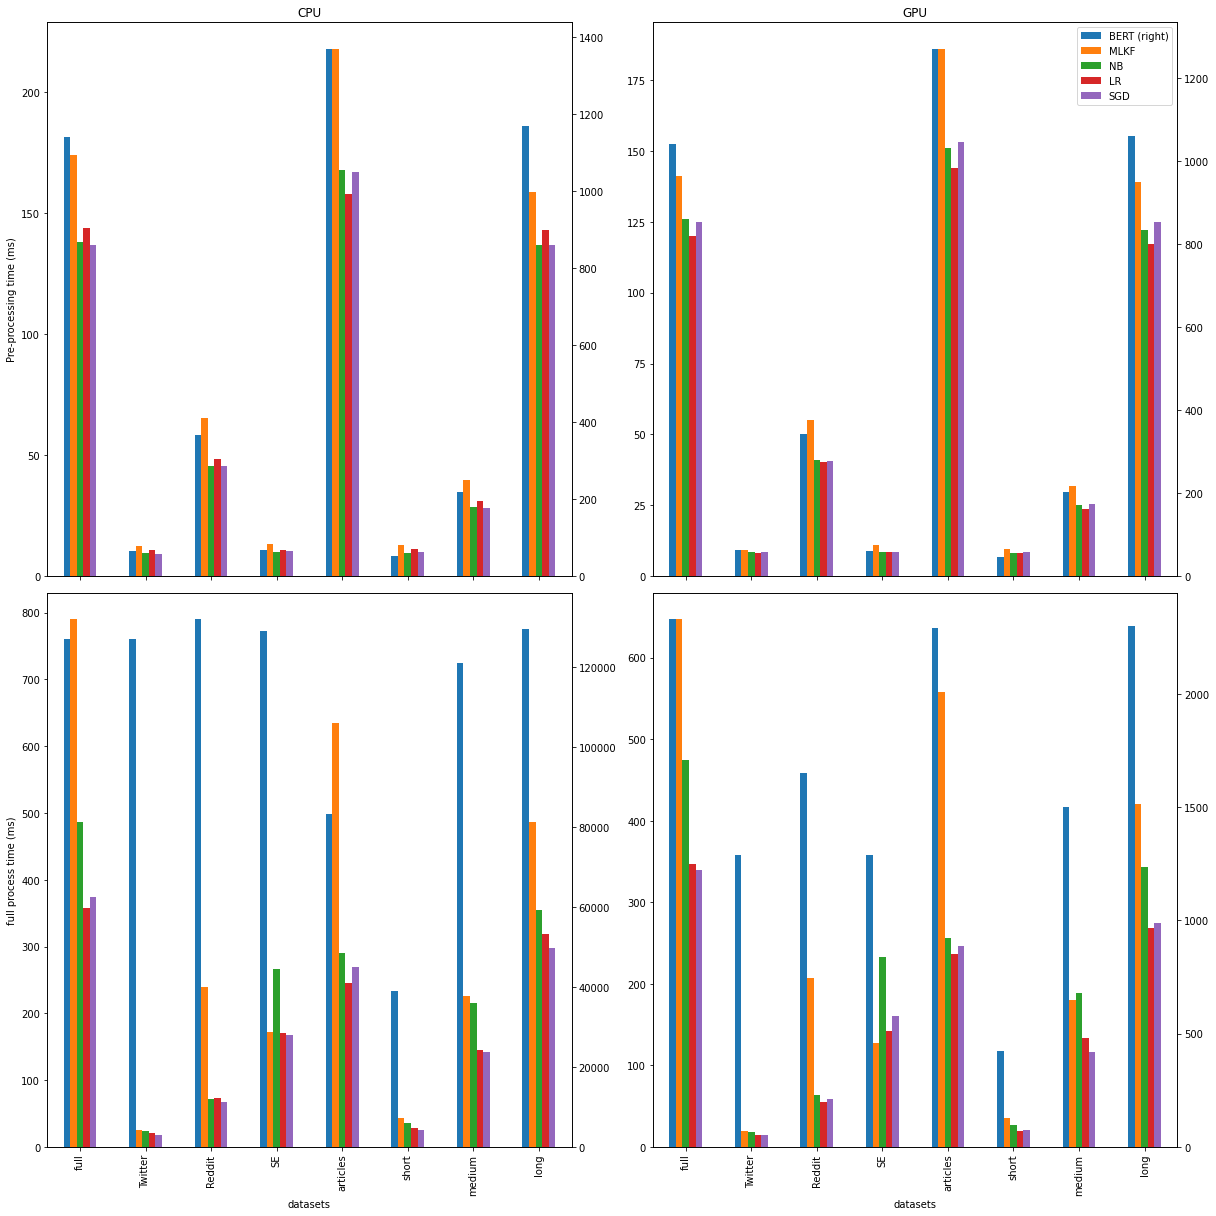

In [0]:
#Figure 5
#\caption{This figure shows a barplot of the processing times for each dataset based on processor type, as well as pre-processing and the full method measured in milliseconds.} 

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", None)

pp_CPU = pd.read_csv("/content/drive/My Drive/CTI datas/preprocessing_CPU.csv")
pp_CPU.set_index('datasets', inplace=True)
pp_CPU = pp_CPU[['BERT','MLKF',  'NB', 'LR', 'SGD']]
####################################################
full_CPU = pd.read_csv("/content/drive/My Drive/CTI datas/full_CPU.csv")
full_CPU.set_index('datasets', inplace=True)
full_CPU = full_CPU[['BERT','MLKF',  'NB', 'LR', 'SGD']]
####################################################
pp_GPU = pd.read_csv("/content/drive/My Drive/CTI datas/preprocessing_GPU.csv")
pp_GPU.set_index('datasets', inplace=True)
pp_GPU = pp_GPU[['BERT','MLKF',  'NB', 'LR', 'SGD']]
####################################################
full_GPU = pd.read_csv("/content/drive/My Drive/CTI datas/full_GPU.csv")
full_GPU.set_index('datasets', inplace=True)
full_GPU = full_GPU[['BERT','MLKF',  'NB', 'LR', 'SGD']]
####################################################

fig = plt.figure(figsize=(17,17)) # Create matplotlib figure

grid = plt.GridSpec(2,2)

ax  = fig.add_subplot(221) # Create matplotlib axes
ax1 = fig.add_subplot(223) # Create matplotlib axes
ax2 = fig.add_subplot(222) # Create matplotlib axes
ax3 = fig.add_subplot(224) # Create matplotlib axes

ax  = pp_CPU.plot(kind='bar',secondary_y='BERT',ax=ax, title="CPU",legend=False)
ax.set_ylabel("Pre-processing time (ms)")
ax1 = full_CPU.plot(kind='bar',secondary_y='BERT',ax=ax1,legend=False)
ax1.set_ylabel("full process time (ms)")
ax2 = pp_GPU.plot(kind='bar',secondary_y='BERT',ax=ax2, title="GPU")
ax3 = full_GPU.plot(kind='bar',secondary_y='BERT',ax=ax3,legend=False)
plt.tight_layout()
plt.show()